# Clustering 군집화 

In [1]:
data(USArrests)
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236.0,58.0,21.2
Alaska,10.0,263.0,48.0,44.5
Arizona,8.1,294.0,80.0,31.0
Arkansas,8.8,190.0,50.0,19.5
California,9.0,276.0,91.0,40.6
Colorado,7.9,204.0,78.0,38.7


In [2]:
round(dist(USArrests))

               Alabama Alaska Arizona Arkansas California Colorado Connecticut
Alaska              37                                                        
Arizona             63     47                                                 
Arkansas            47     77     109                                         
California          56     45      23       98                                
Colorado            42     66      90       37         73                     
Connecticut        128    159     185       85        169       98            
Delaware            17     45      59       53         49       41         128
Florida            102     80      42      149         61      131         226
Georgia             26     57      86       26         74       25         104
Hawaii             192    221     248      148        231      159          65
Idaho              117    146     177       71        163       91          25
Illinois            28     43      46       68      

In [3]:
round(dist(USArrests, method = "manhattan"))

               Alabama Alaska Arizona Arkansas California Colorado Connecticut
Alaska              64                                                        
Arizona             95     78                                                 
Arkansas            60    101     146                                         
California          97     61      40      148                                
Colorado            75     97     100       62         88                     
Connecticut        165    222     212      121        215      127            
Delaware            29     82      81       77         85       65         140
Florida            134    122      49      194         85      147         261
Georgia             36     90     118       46        119       47         147
Hawaii             224    281     265      181        262      184          81
Idaho              138    187     222       86        226      138          37
Illinois            44     70      57       98      

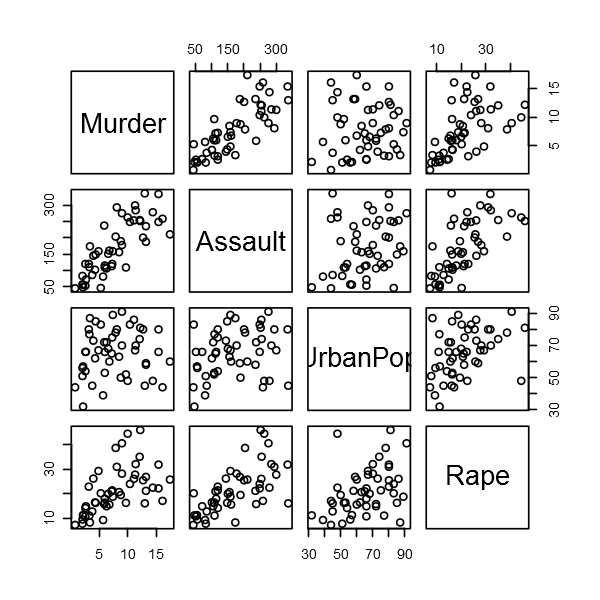

In [4]:
options(repr.plot.width=5, repr.plot.height=5)
pairs(USArrests)

In [5]:
mahalanobis(USArrests, colMeans(USArrests), cov(USArrests)) # 열의 중심에서 얼마나 떨어져있냐? 공분산 행렬을 통해서 

Alabama         Alaska        Arizona       Arkansas     California 
     2.3361665     15.1680638      5.7240749      1.4744001      6.5198834 
      Colorado    Connecticut       Delaware        Florida        Georgia 
     5.1675431      3.1199978      5.9206962      4.5555037      9.5556141 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
     7.3838682      2.6996606      2.5572838      1.2856909      2.0936916 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
     0.5659241      3.6753352      4.5743258      3.0391048      3.2438436 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
     3.4493654      2.2467698      1.6179094      7.8368676      0.9402315 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
     1.0947097      0.7563206      8.1390645      2.2557657      4.0342537 
    New Mexico       New York North Carolina   North Dakota           Ohio 
     2.3134509      2.9272068     12.6102433      4.5070960      1.8374468 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
     0.1216993      3.0387808      1.8044534      9.7843187      4.7363035 
  South Dakota      Tennessee          Texas           Utah        Vermont 
     2.7168038      3.6333816      3.8972486      2.5391464      7.1116744 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
     0.2960040      2.2992245      3.8954199      2.3234779      0.5746895

## 계층적 군집분석 : 최단 연결법(Single Linkage)

In [6]:
x <- data.frame(c(1,3,6,12,20))
rownames(x) <- c("a","b","c","d","e")
colnames(x) <- "range"
x

,range
a,1
b,3
c,6
d,12
e,20


 - row / col Names은 각 해당 값 
 - 안의 Value는 두개의 거리 차이. 

In [7]:
dist(x,method="euclidean")

   a  b  c  d
b  2         
c  5  3      
d 11  9  6   
e 19 17 14  8

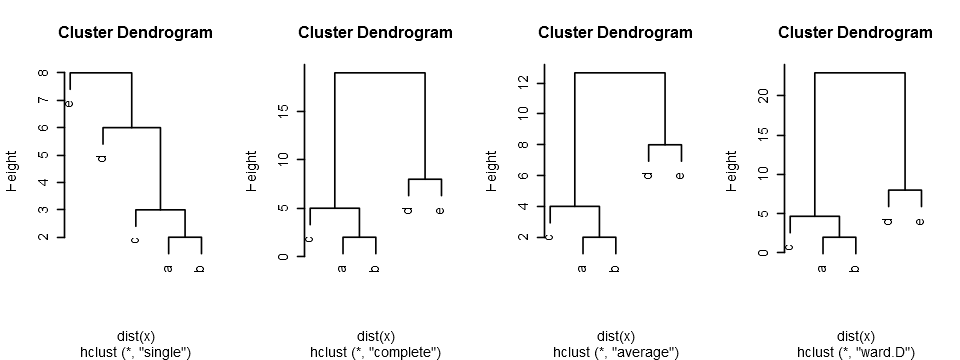

In [8]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,4))
hc1 <- hclust(dist(x),method="single")
plot(hc1)
hc2 <- hclust(dist(x),method="complete")
plot(hc2)
hc3 <- hclust(dist(x),method="average")
plot(hc3)
hc4 <- hclust(dist(x),method="ward.D")
plot(hc4)
par(mfrow=c(1,1))

### Cluster  생성이후 
 - 우리가 짜른 기준에 잘 자른것이 맞는지. 특성이 비슷한게 무엇인지 등의 판단을 해야한다. 

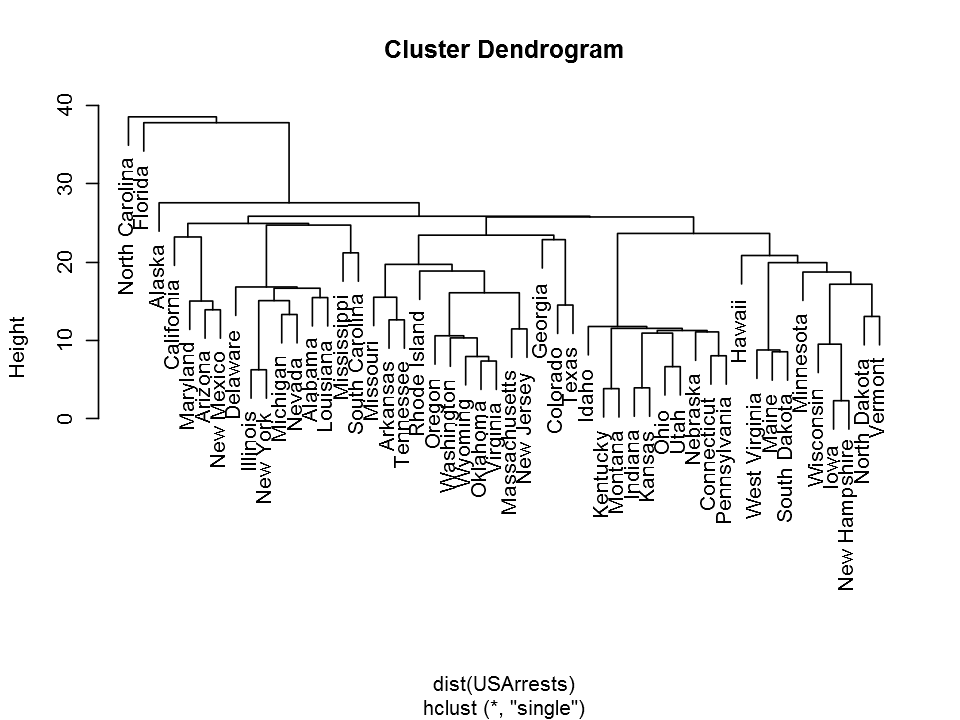

In [9]:
options(repr.plot.width=8, repr.plot.height=6)
hc1 <- hclust(dist(USArrests),method="single")
plot(hc1)

### Cutree
 - 몇개의 그룹으로 나누겠다.
 - Height 몇에서 자르겠다. 등의 조건을 줄 수있다. 

In [10]:
USArrests_s <- scale(USArrests)

In [11]:
hc3 <- hclust(dist(USArrests_s),method="average")
hc3_result <- cutree(hc3,k=5)

 - 어디 Cluster에 있는지 표시 

In [12]:
t(hc3_result) 

Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,2,3,4,3,3,4,4,3,1,...,5,1,3,4,5,4,4,5,4,4


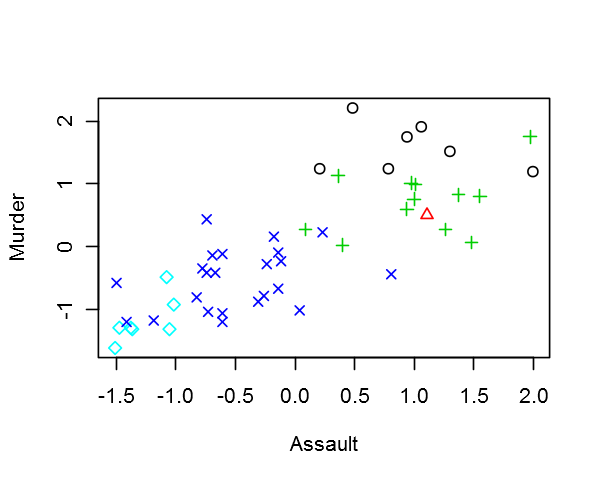

In [13]:
options(repr.plot.width=5, repr.plot.height=4)
plot(Murder ~ Assault, data=USArrests_s, col=hc3_result,pch=hc3_result)

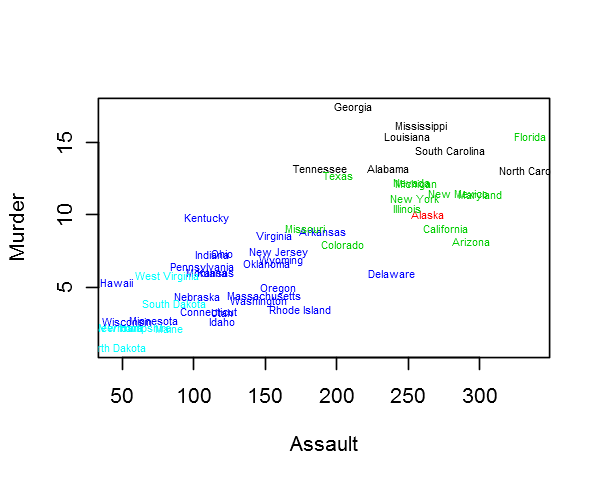

In [14]:
plot(Murder ~ Assault, data=USArrests, type="n")
text(USArrests$Assault,USArrests$Murder, rownames(USArrests), col=hc3_result, cex=0.5)

 - 각 군집의 특징을 보는 것이좋다.

In [15]:
USArrests_s <- cbind(USArrests_s,hc3_result)

In [16]:
head(USArrests_s)

,Murder,Assault,UrbanPop,Rape,hc3_result
Alabama,1.242564084,0.782839347,-0.520906615,-0.003416473,1.000000000
Alaska,0.5078625,1.1068225,-1.2117642,2.4842029,2.0000000
Arizona,0.07163341,1.47880321,0.99898006,1.04287839,3.00000000
Arkansas,0.2323494,0.2308680,-1.0735927,-0.1849166,4.0000000
California,0.2782682,1.2628144,1.7589234,2.0678203,3.0000000
Colorado,0.02571456,0.39885929,0.86080854,1.86496721,3.00000000


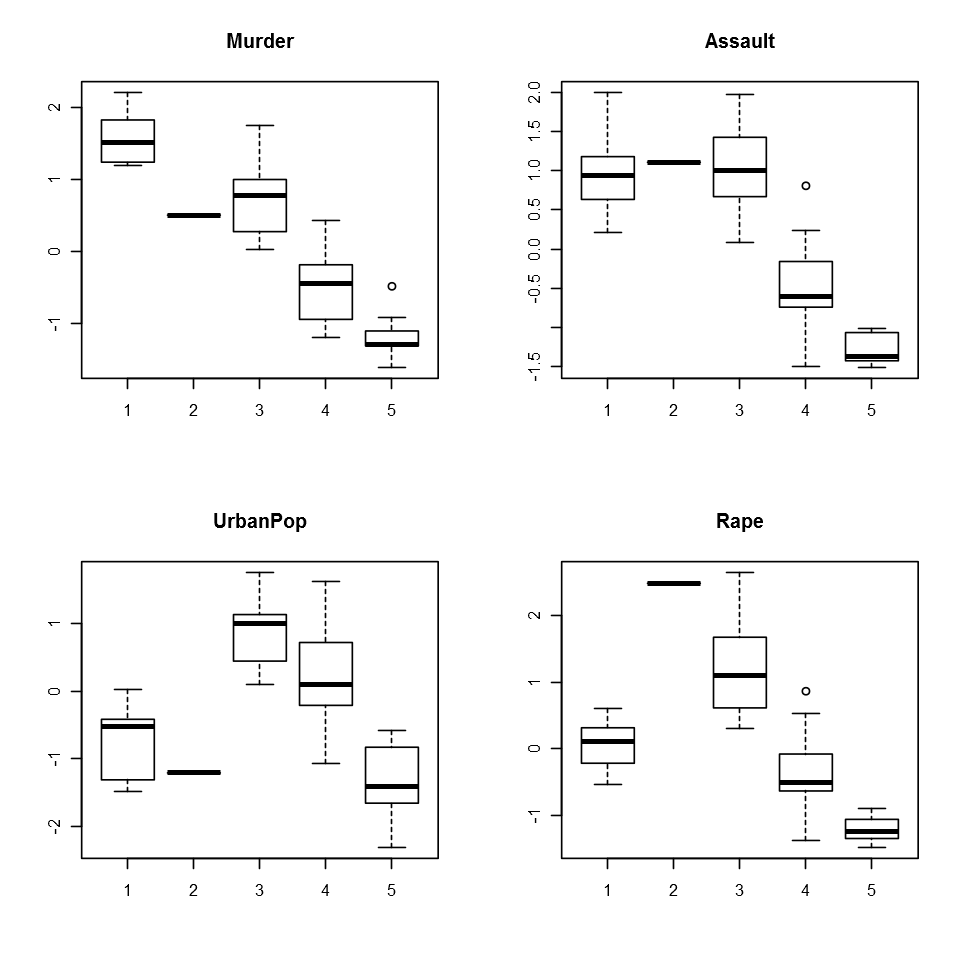

In [23]:
options(repr.plot.width=8, repr.plot.height=8)
par(mfrow=c(2,2))
for (i in 1:4){
     boxplot(USArrests_s[,i]~USArrests_s[,5],main=names(USArrests)[i])
}

In [33]:
USArrests_s[hc3_result==2,]

Murder    Assault   UrbanPop       Rape hc3_result 
 0.5078625  1.1068225 -1.2117642  2.4842029  2.0000000

 - 위와 같이 하나의 데이터만 있기 때문에 그냥 하나로 ( 벡터로 인식 ) 출력된다.
 - Matrix형태로 변환해서 출력되야한다. 

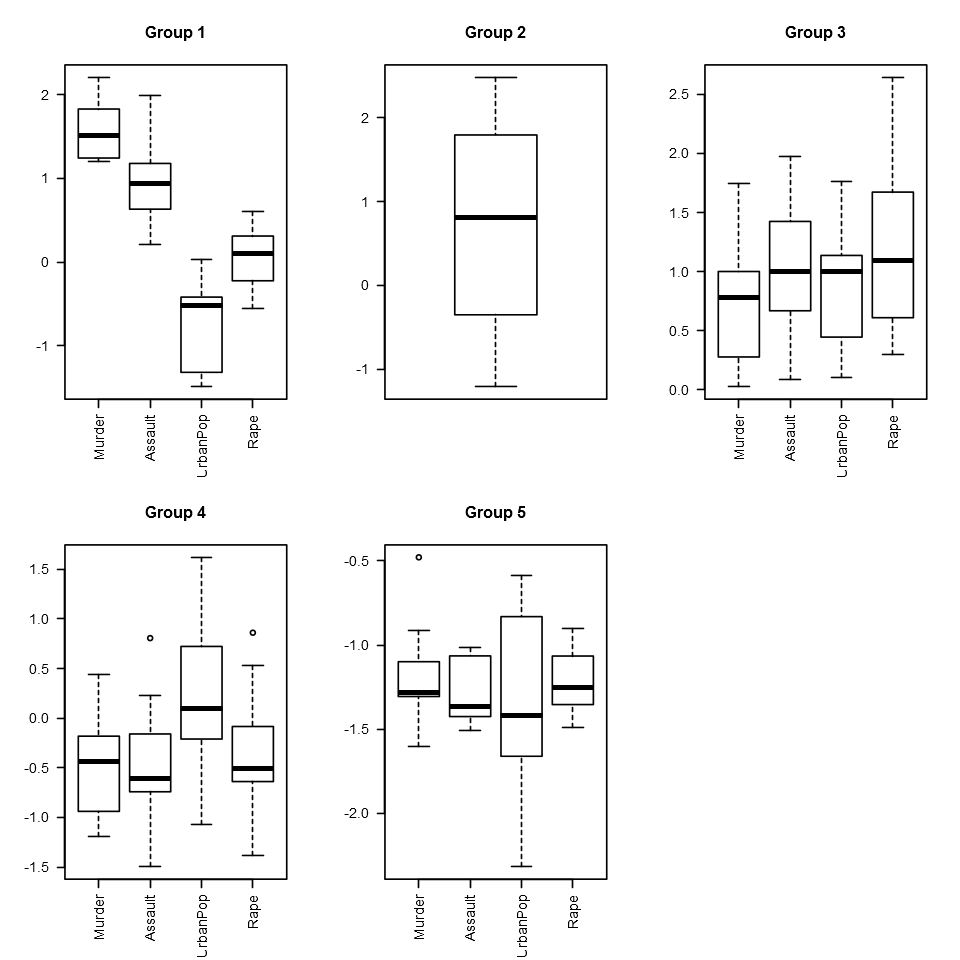

In [32]:
par(mfrow=c(2,3))
for(i in 1:5){
    boxplot(USArrests_s[hc3_result==i,-5],las=2, main=paste("Group",i))
}

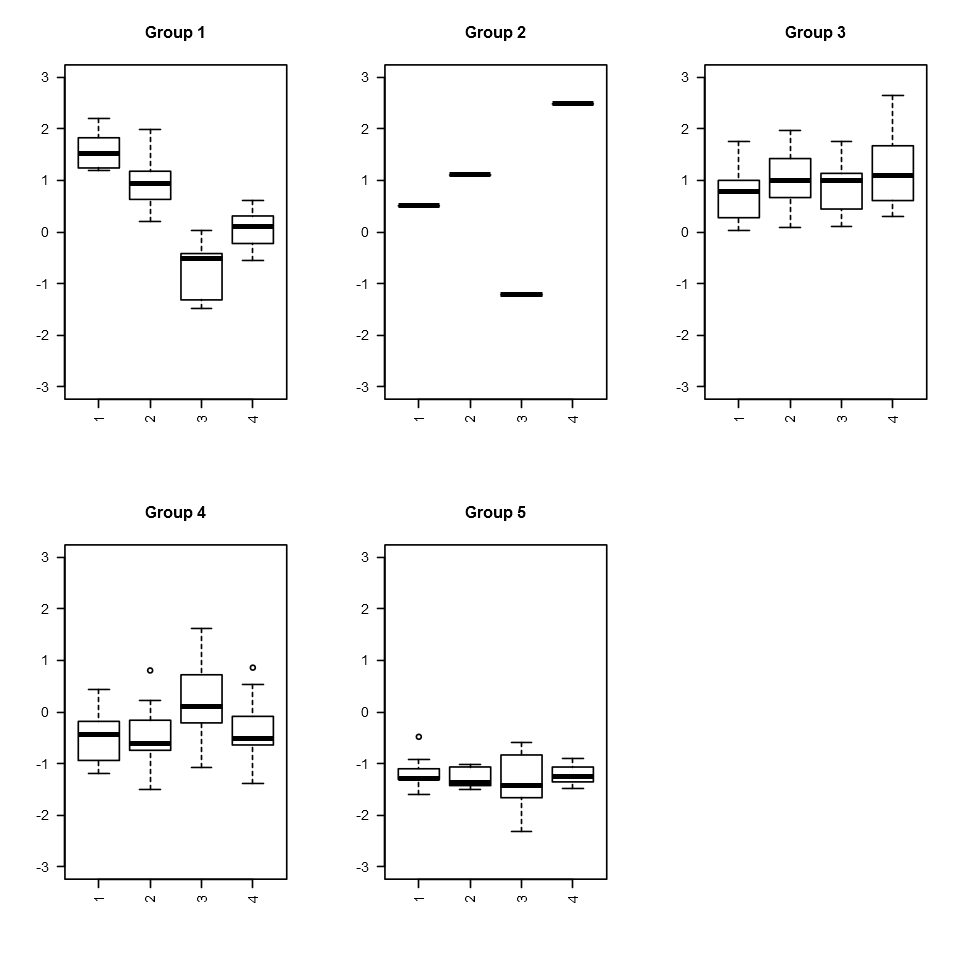

In [49]:
par(mfrow=c(2,3))
for (i in 1:5){
  boxplot(matrix(USArrests_s[hc3_result==i,-5],,4),las=2,main=paste("Group",i),
          ylim=c(-3,3))
}

 - 데이터를 보는 방법 2

In [18]:
library(psych)

In [19]:
describe(USArrests_s[,-5])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Murder,1.000000e+00,5.000000e+01,-7.663087e-17,1.000000e+00,-1.235217e-01,-5.866133e-02,1.242447e+00,-1.604405e+00,2.206860e+00,3.811265e+00,3.706342e-01,-9.492304e-01,1.414214e-01
Assault,2.000000e+00,5.000000e+01,1.112408e-16,1.000000e+00,-1.411127e-01,-2.741858e-02,1.325376e+00,-1.509042e+00,1.994776e+00,3.503818e+00,2.205325e-01,-1.145487e+00,1.414214e-01
UrbanPop,3.000000e+00,5.000000e+01,-4.332808e-16,1.000000e+00,3.177945e-02,2.314373e-02,1.229119e+00,-2.317136e+00,1.758923e+00,4.076060e+00,-2.126297e-01,-8.719550e-01,1.414214e-01
Rape,4.000000e+00,5.000000e+01,8.942391e-17,1.000000e+00,-1.208577e-01,-9.283198e-02,9.180789e-01,-1.487447e+00,2.644350e+00,4.131797e+00,7.537694e-01,7.510264e-02,1.414214e-01


In [20]:
describeBy(USArrests, group=hc3_result)

group: 1
         vars n   mean    sd median trimmed   mad   min   max range  skew
Murder      1 7  14.67  1.69   14.4   14.67  1.78  13.0  17.4   4.4  0.37
Assault     2 7 251.29 48.38  249.0  251.29 44.48 188.0 337.0 149.0  0.42
UrbanPop    3 7  54.29  8.54   58.0   54.29 11.86  44.0  66.0  22.0 -0.04
Rape        4 7  21.69  4.03   22.2   21.69  5.34  16.1  26.9  10.8 -0.13
         kurtosis    se
Murder      -1.66  0.64
Assault     -1.09 18.28
UrbanPop    -1.90  3.23
Rape        -1.68  1.52
------------------------------------------------------------ 
group: 2
         vars n  mean sd median trimmed mad   min   max range skew kurtosis se
Murder      1 1  10.0 NA   10.0    10.0   0  10.0  10.0     0   NA       NA NA
Assault     2 1 263.0 NA  263.0   263.0   0 263.0 263.0     0   NA       NA NA
UrbanPop    3 1  48.0 NA   48.0    48.0   0  48.0  48.0     0   NA       NA NA
Rape        4 1  44.5 NA   44.5    44.5   0  44.5  44.5     0   NA       NA NA
-----------------------------------

## Kmeans Function 
 - 비계층적군집분석

In [68]:
km=kmeans(USArrests_s[,-5],3)
km

K-means clustering with 3 clusters of sizes 19, 18, 13

Cluster means:
      Murder    Assault   UrbanPop       Rape
1 -0.7585311 -0.9021258 -0.6481699 -0.8148288
2 -0.1413790  0.1328731  0.8838371  0.3073877
3  1.3043779  1.1345134 -0.2764493  0.7652900

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             3              3              2              1              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              1              2              3              3 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              1              2              1              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             1              1              3              1              3 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              3            

In [69]:
head(km$cluster)

Alabama     Alaska    Arizona   Arkansas California   Colorado 
         3          3          2          1          2          2

In [70]:
head(km$centers)

,Murder,Assault,UrbanPop,Rape
1,-0.7585311,-0.9021258,-0.6481699,-0.8148288
2,-0.1413790,0.1328731,0.8838371,0.3073877
3,1.3043779,1.1345134,-0.2764493,0.7652900


 - 각 클러스터의 중심에서 각 클러스터의 해당 값의 거리 제곱의 합

In [58]:
km$withinss

[1] 46.74796 19.62285 11.95246

 - 전체 데이터의 중심에서 각 클러스터의 중심으로 거리 
 - withinss < betweenssr가 되어야 된다.

In [59]:
km$betweenss

[1] 117.6767

In [63]:
USArrests_s <- as.data.frame(USArrests_s)

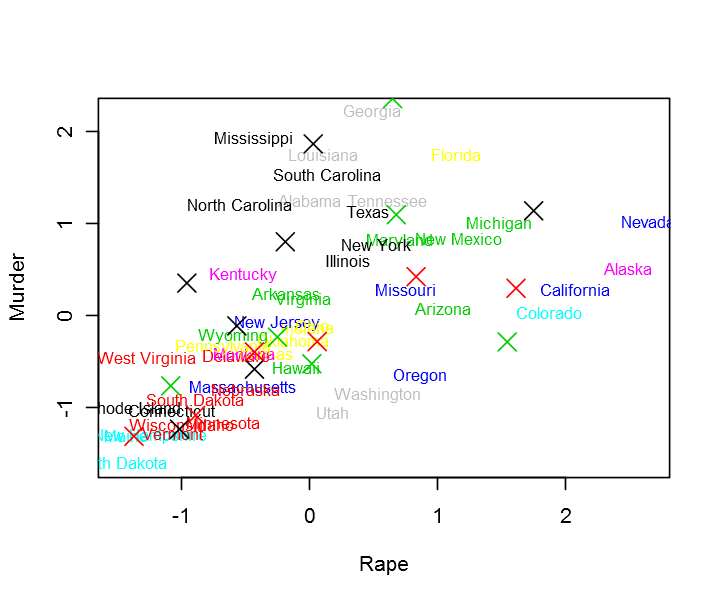

In [82]:
options(repr.plot.width=6,repr.plot.height=5)
plot(Murder ~ Rape, data = USArrests_s, type="n")
text(USArrests_s$Rape, USArrests_s$Murder, rownames(USArrests),col=km$cluster, cex=0.8)
points(km$centers[,c(1,4)],col=1:3,pch=4, cex=2)

In [75]:
wss = c()
for(i in 2:20){
   km=kmeans(USArrests_s[,-5],i)
   wss[i] = sum(km$withinss)
}

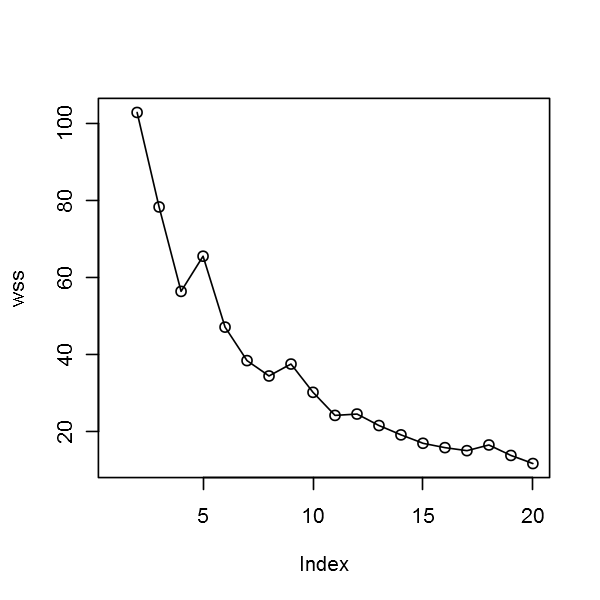

In [80]:
options(repr.plot.width=5,repr.plot.height=5)
plot(wss,type="l")
points(wss)

# Pracice 4

In [83]:
jet <- read.csv("jet.csv")
head(jet)

,X,FFD,SPR,RGF,PLF,SLF,CAR
1,FH-1,82,1.468,3.3,0.166,0.1,no
2,FJ-1,89,1.605,3.64,0.154,0.1,no
3,F-86A,101,2.168,4.87,0.177,2.9,yes
4,F9F-2,107,2.054,4.72,0.275,1.1,no
5,F-94A,115,2.467,4.11,0.298,1,yes
6,F3D-1,122,1.294,3.75,0.15,0.9,no


 - 계층적군집분석

In [91]:
jet2 <- jet
rownames(jet2) <- jet[,1]

In [92]:
jet2 <- jet2[,-c(1,2,7)]
jet2_s <- as.data.frame(scale(jet2))

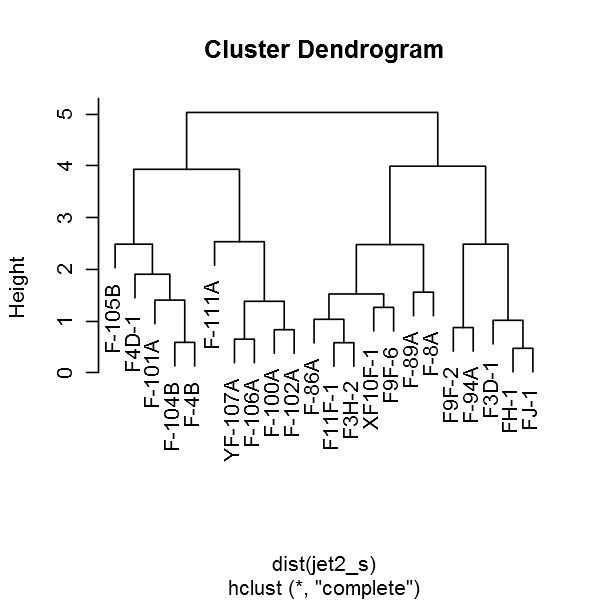

In [96]:
hc = hclust(dist(jet2_s),method = "complete")
plot(hc)

 - barplot 에서 standard error bar 를 그리기 

In [98]:
jet2_s$cluster <- cutree(hc,2)

In [101]:
# long type? 비교 값들이 세로로 쭉 있는것.
head(jet2_s)

,SPR,RGF,PLF,SLF,cluster
FH-1,-1.04614198,-1.69627044,-0.02622718,-2.15830567,1.00000000
FJ-1,-0.9882683,-1.2447365,-0.1647067,-2.1583057,1.0000000
F-86A,-0.7504372,0.3887538,0.1007124,0.6324506,1.0000000
F9F-2,-0.7985949,0.1895477,1.2316285,-1.1616070,1.0000000
F-94A,-0.6241291,-0.6205573,1.4970476,-1.2612769,1.0000000
F3D-1,-1.1196457,-1.0986520,-0.2108665,-1.3609467,1.0000000


In [104]:
library(ggplot2)
library(psych)

In [106]:
describeBy(jet2_s,group=jet2_s$cluster)

group: 1
        vars  n  mean   sd median trimmed  mad   min   max range  skew kurtosis
SPR        1 12 -0.78 0.35  -0.75   -0.77 0.31 -1.47 -0.14  1.34 -0.18    -0.50
RGF        2 12 -0.47 0.71  -0.48   -0.45 0.89 -1.70  0.55  2.24 -0.11    -1.44
PLF        3 12 -0.19 1.00  -0.16   -0.18 0.39 -1.94  1.50  3.44 -0.19    -0.59
SLF        4 12 -0.51 1.07  -0.21   -0.47 1.33 -2.16  0.73  2.89 -0.31    -1.60
cluster    5 12  1.00 0.00   1.00    1.00 0.00  1.00  1.00  0.00   NaN      NaN
          se
SPR     0.10
RGF     0.21
PLF     0.29
SLF     0.31
cluster 0.00
------------------------------------------------------------ 
group: 2
        vars  n mean   sd median trimmed  mad   min  max range  skew kurtosis
SPR        1 10 0.93 0.64   0.95    0.93 0.79 -0.03 1.94  1.97  0.06    -1.37
RGF        2 10 0.57 1.03   0.64    0.53 1.07 -1.01 2.49  3.49  0.21    -1.02
PLF        3 10 0.23 1.00   0.13    0.12 1.21 -0.91 2.28  3.20  0.59    -0.79
SLF        4 10 0.61 0.41   0.63    0.64 0.37 -0.2

 - sd : 표준편차 
 - se : $sd \over \sqrt{n}$

In [108]:
tab <- describeBy(jet2_s[,1],group=jet2_s$cluster,mat=T)
tab

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X11,1,1,1,12,-0.777649105855885,0.347713483759491,-0.747268962388366,-0.771981431350357,0.313777640136879,-1.47406901109104,-0.137905945676009,1.33616306541503,-0.180440849495894,-0.496206813119712,0.100376236724702
X12,2,2,1,10,0.933178927027062,0.641609260184883,0.953244606953466,0.926789592103128,0.78820191639174,-0.027227879555636,1.94470041300123,1.97192829255687,0.06475811783417,-1.36927480511994,0.202894663003982


In [111]:
gg <- ggplot(tab,aes(x=group1,y=mean)) 

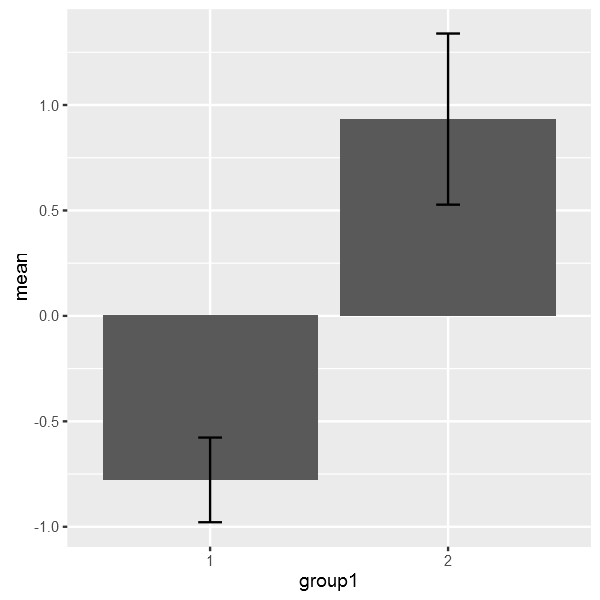

In [115]:
gg + geom_bar(position = position_dodge(), stat="identity") + geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se, width=0.1))

 - 비계층적군집분석
  - 군집 개수 1~5까지를 사용해 k-means clustering을 시행하고 얻은 within-group sum of squares를 저장하고 그래프로 표현하여 적절한 군집 개수를 판단하시오.
  - K-means clustering을 이용해 2개의 집단으로 군집화하고 그 결과를 1번의 B, C와 같이 탐색하시오.

In [86]:
result <- c()
for(i in 1:5){
    km <- kmeans(jet[,-c(1,7)],i)
    result[i] <- sum(km$withinss)
}

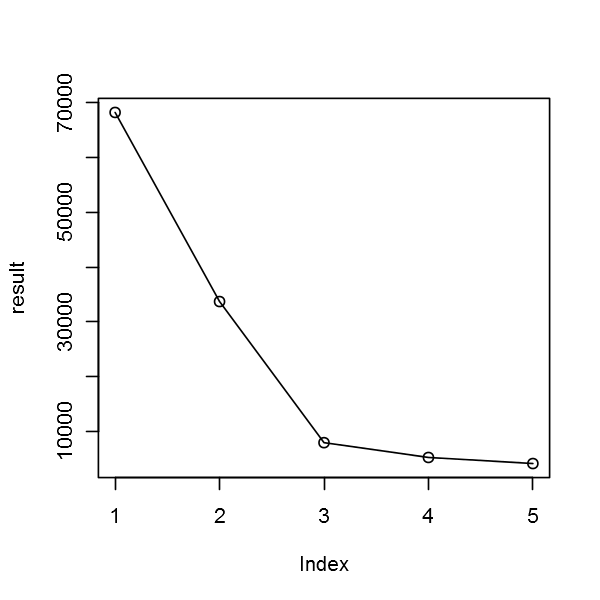

In [87]:
options(repr.plot.width=5,repr.plot.height=5)
plot(result,type="l")
points(result)